# Vanilla Helmholtz machine

Here, we implement and train the Helmholtz machine from the Dayan and Abbott book (chapter 10)

It is a 2 layer machine with binary units

We will train it to learn latent representations of MNIST

In [9]:
import torch
import matplotlib.pyplot as plt
from helmholtz import BinaryHelmholtz, BinaryHelmholtzEasyMode
from mnist import MNIST
from tqdm import tqdm

### Interpretable implementation

First, define model and dataset:

In [10]:
dataset = MNIST('.', binary = True)
helmholtz = BinaryHelmholtzEasyMode(data_dim=dataset.data_dim, latent_dim=100)

Initialise everything we need for training:

In [9]:
wake_losses = []
sleep_losses = []
optim = torch.optim.Adam(helmholtz.parameters(), lr = 0.001)
minibatch_size = 128
num_minibatches = dataset.data['train'][0].shape[0] // minibatch_size + 1
beta = 0.2

Define the loop

In the `BinaryHelmholtz` class itself, we define the loss as a binary cross entropy (BCE).

This is not included in the book, but we can do some simple tests to ensure they is the case.

To do so, set batchsize = 1 (as in the book), break the loop at the noted point, and run the lines there (one test at a time only)

You will see that the weight adjustments defined in the book and those induced by SGD on the BCE loss differ only by a constant factor, which is the size of the vector (loss is averaged across the vector size)

In [10]:
for epoch in range(1, 21):
    
    round_num = 0

    all_minibatches = list(dataset.random_minibatches('train', minibatch_size, num_minibatches))
    
    for minibatch_data, _ in tqdm(all_minibatches):

        minibatch_data = torch.tensor(minibatch_data)

        # Wake phase
        optim.zero_grad()
        g_loss, G_and_h_loss, recognised_latent = helmholtz.wake_phase_losses(minibatch_data)
        wake_loss = (g_loss + G_and_h_loss) * beta
        wake_losses.append(wake_loss.item())
    
        # Sleep phase
        optim.zero_grad()
        sleep_loss, rerecognised_latent_conditional, dreamt_latent, dreamt_data = helmholtz.sleep_phase_losses(minibatch_data.shape[0])
        sleep_losses.append(sleep_loss.item())

        ## Some tests, keeping batchsize = 1. These should all evaluate to the relevant sizes of the data/latents

        # g_loss.backward()
        # (recognised_latent - helmholtz.latent_prior_bernoulli(recognised_latent.shape[0])) / helmholtz.g.grad

        # G_and_h_loss.backward()
        # (minibatch_data - helmholtz.generative_model_conditional_bernoulli(recognised_latent)) / helmholtz.G_and_h.bias.grad
        # torch.outer((minibatch_data - helmholtz.generative_model_conditional_bernoulli(recognised_latent))[0], recognised_latent[0]) / helmholtz.G_and_h.weight.grad

        # sleep_loss.backward()
        # (dreamt_latent - rerecognised_latent_conditional)/ helmholtz.W_and_w.bias.grad
        # torch.outer((dreamt_latent - rerecognised_latent_conditional)[0], minibatch_data[0])/ helmholtz.W_and_w.weight.grad

        total_loss = wake_loss + sleep_loss
        total_loss.backward()
        optim.step()

        round_num += 1

    print("Epoch", epoch, "done", wake_losses[-1], sleep_losses[-1])



  0%|          | 0/391 [00:00<?, ?it/s]/opt/anaconda3/envs/container/lib/python3.8/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 391/391 [00:03<00:00, 103.85it/s]


Epoch 1 0.17558732628822327 0.6086666584014893


100%|██████████| 391/391 [00:03<00:00, 116.42it/s]


Epoch 2 0.17283962666988373 0.5971492528915405


100%|██████████| 391/391 [00:03<00:00, 104.03it/s]


Epoch 3 0.16764101386070251 0.5937021374702454


100%|██████████| 391/391 [00:03<00:00, 116.85it/s]


Epoch 4 0.1642625331878662 0.5772309899330139


100%|██████████| 391/391 [00:03<00:00, 116.04it/s]


Epoch 5 0.1622610092163086 0.5689402222633362


100%|██████████| 391/391 [00:04<00:00, 88.68it/s] 


Epoch 6 0.1610734760761261 0.5481811761856079


100%|██████████| 391/391 [00:04<00:00, 93.91it/s]


Epoch 7 0.1575010120868683 0.5298869609832764


100%|██████████| 391/391 [00:04<00:00, 88.91it/s] 


Epoch 8 0.1560041904449463 0.5177215933799744


100%|██████████| 391/391 [00:03<00:00, 106.25it/s]


Epoch 9 0.1532193273305893 0.4938068091869354


100%|██████████| 391/391 [00:03<00:00, 104.38it/s]


Epoch 10 0.14869092404842377 0.48115384578704834


100%|██████████| 391/391 [00:04<00:00, 95.78it/s] 


Epoch 11 0.14515681564807892 0.4600292146205902


100%|██████████| 391/391 [00:04<00:00, 90.00it/s]


Epoch 12 0.140704944729805 0.4444972276687622


100%|██████████| 391/391 [00:04<00:00, 94.51it/s] 


Epoch 13 0.1392664760351181 0.4013403356075287


100%|██████████| 391/391 [00:03<00:00, 115.06it/s]


Epoch 14 0.13575683534145355 0.40502938628196716


100%|██████████| 391/391 [00:03<00:00, 103.36it/s]


Epoch 15 0.1348046362400055 0.3824826776981354


100%|██████████| 391/391 [00:04<00:00, 78.60it/s]


Epoch 16 0.13127774000167847 0.36318862438201904


100%|██████████| 391/391 [00:04<00:00, 91.54it/s] 


Epoch 17 0.13341230154037476 0.35654276609420776


100%|██████████| 391/391 [00:04<00:00, 96.10it/s] 


Epoch 18 0.1303338259458542 0.35359832644462585


100%|██████████| 391/391 [00:04<00:00, 96.00it/s] 


Epoch 19 0.130358025431633 0.35153692960739136


100%|██████████| 391/391 [00:04<00:00, 97.62it/s] 

Epoch 20 0.1306997388601303 0.33639952540397644


Learning!

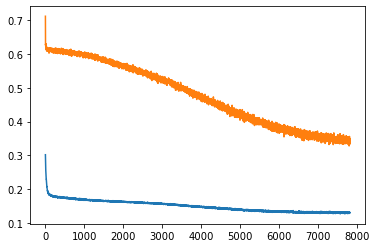

In [12]:
fig, axes = plt.subplots(1)
axes.plot(wake_losses)
axes.plot(sleep_losses)

Some example real data, in case you forgot what MNIST looks like

Text(0.5, 0.98, 'Real data')

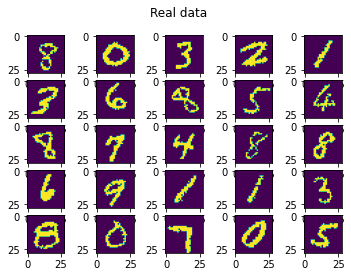

In [11]:
fig, axes = plt.subplots(5, 5)
for ax, data in zip(axes.reshape(-1), minibatch_data):
    ax.imshow(data.reshape(28, 28))
fig.suptitle('Real data')

Some 'dreamt' data, conditioned on latents drawn from the learned prior

Text(0.5, 0.98, 'Completely new latents')

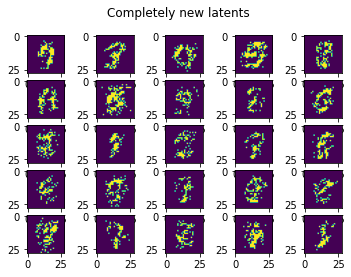

In [13]:
new_latents = helmholtz.draw_latent(helmholtz.latent_prior_bernoulli(25))
new_data = helmholtz.draw_data(helmholtz.generative_model_conditional_bernoulli(new_latents))
fig, axes = plt.subplots(5, 5)
for ax, data in zip(axes.reshape(-1), new_data.detach().numpy()):
    ax.imshow(data.reshape(28, 28))
fig.suptitle('Completely new latents')

Some 'dreamt' data, conditioned on latents recognised from some real data. Same batch as above, so you can directly compare!

Text(0.5, 0.98, 'Infered latents')

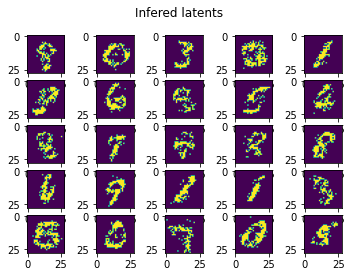

In [14]:
rec_conditional = helmholtz.recognition_model_variational_bernoulli(minibatch_data)
last_latent = helmholtz.draw_latent(rec_conditional)
rec_last_data = helmholtz.draw_data(helmholtz.generative_model_conditional_bernoulli(last_latent))
fig, axes = plt.subplots(5, 5)
for ax, data in zip(axes.reshape(-1), rec_last_data.detach().numpy()):
    ax.imshow(data.reshape(28, 28))
fig.suptitle('Infered latents')

### Generalised implementation

This implementaiton was made to generalise to any number of layers, with any exponential family model for each layer. This will be used for the DDC-HM model (Vertes and Sahani, 2018)

In [1]:
import torch
import matplotlib.pyplot as plt
from helmholtz import BinaryHelmholtz, BinaryHelmholtzEasyMode
from mnist import MNIST
from tqdm import tqdm

In [2]:
dataset = MNIST('/Users/puriaradmard/Documents/GitHub/helmholtz', binary = True)
helmholtz2 = BinaryHelmholtz(data_dim=dataset.data_dim, latent_dims=[100])

TypeError: Can't instantiate abstract class LinearBernoulliPriorModelLayer with abstract methods generate_sufficient_statistic, mean

Reinitialise training

In [3]:
wake_losses = []
sleep_losses = []
optim = torch.optim.Adam(helmholtz2.parameters(), lr = 0.001)
minibatch_size = 128
num_minibatches = dataset.data['train'][0].shape[0] // minibatch_size + 1
beta = 0.2

Should be exactly the same, except outputs are different (no tests)

In [4]:
for epoch in range(1, 21):
    
    round_num = 0

    all_minibatches = list(dataset.random_minibatches('train', minibatch_size, num_minibatches))
    
    for minibatch_data, _ in tqdm(all_minibatches):

        minibatch_data = torch.tensor(minibatch_data)

        # Wake phase
        optim.zero_grad()
        all_wake_losses = helmholtz2.wake_phase_losses(minibatch_data)
        wake_loss = sum(all_wake_losses) * beta
        wake_losses.append(wake_loss.item())
    
        # Sleep phase
        optim.zero_grad()
        all_sleep_losses = helmholtz2.sleep_phase_losses(minibatch_data.shape[0])
        sleep_loss = sum(all_sleep_losses)
        sleep_losses.append(sleep_loss.item())

        total_loss = wake_loss + sleep_loss
        total_loss.backward()
        optim.step()

        round_num += 1

    print("Epoch", epoch, "done", wake_losses[-1], sleep_losses[-1])



  0%|          | 0/391 [00:00<?, ?it/s]/opt/anaconda3/envs/container/lib/python3.8/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 391/391 [00:03<00:00, 122.58it/s]


Epoch 1 done 0.050378210842609406 0.5923038125038147


100%|██████████| 391/391 [00:03<00:00, 129.27it/s]


Epoch 2 done 0.043324511498212814 0.5784445405006409


100%|██████████| 391/391 [00:02<00:00, 136.88it/s]


Epoch 3 done 0.03826514258980751 0.5660619139671326


100%|██████████| 391/391 [00:02<00:00, 136.48it/s]


Epoch 4 done 0.036406755447387695 0.5495718121528625


100%|██████████| 391/391 [00:02<00:00, 137.80it/s]


Epoch 5 done 0.034844208508729935 0.5414272546768188


100%|██████████| 391/391 [00:02<00:00, 135.27it/s]


Epoch 6 done 0.034858934581279755 0.5330029129981995


100%|██████████| 391/391 [00:02<00:00, 133.02it/s]


Epoch 7 done 0.03196867182850838 0.5177359580993652


100%|██████████| 391/391 [00:03<00:00, 124.04it/s]


Epoch 8 done 0.031840983778238297 0.513659656047821


100%|██████████| 391/391 [00:02<00:00, 134.27it/s]


Epoch 9 done 0.032064180821180344 0.5082312226295471


100%|██████████| 391/391 [00:02<00:00, 138.16it/s]


Epoch 10 done 0.03214726224541664 0.5129691362380981


100%|██████████| 391/391 [00:02<00:00, 136.83it/s]


Epoch 11 done 0.03052361309528351 0.5010794401168823


100%|██████████| 391/391 [00:02<00:00, 136.25it/s]


Epoch 12 done 0.030173921957612038 0.505979597568512


100%|██████████| 391/391 [00:02<00:00, 139.40it/s]


Epoch 13 done 0.030051996931433678 0.4951629340648651


100%|██████████| 391/391 [00:02<00:00, 136.34it/s]


Epoch 14 done 0.02938344143331051 0.4932832419872284


100%|██████████| 391/391 [00:02<00:00, 132.14it/s]


Epoch 15 done 0.029935840517282486 0.496268093585968


100%|██████████| 391/391 [00:02<00:00, 138.88it/s]


Epoch 16 done 0.029262451454997063 0.4915982782840729


100%|██████████| 391/391 [00:02<00:00, 135.16it/s]


Epoch 17 done 0.03050578199326992 0.495721697807312


100%|██████████| 391/391 [00:02<00:00, 136.21it/s]


Epoch 18 done 0.028490576893091202 0.48680388927459717


100%|██████████| 391/391 [00:02<00:00, 134.14it/s]


Epoch 19 done 0.02908491902053356 0.5011651515960693


100%|██████████| 391/391 [00:03<00:00, 128.38it/s]

Epoch 20 done 0.02934076450765133 0.4922686815261841


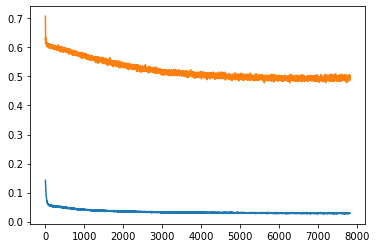

In [5]:
fig, axes = plt.subplots(1)
axes.plot(wake_losses)
axes.plot(sleep_losses)

Text(0.5, 0.98, 'Real data')

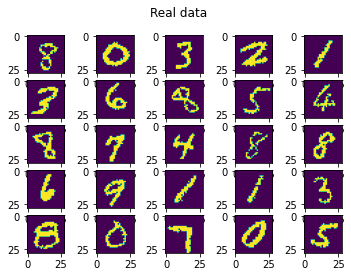

In [6]:
fig, axes = plt.subplots(5, 5)
for ax, data in zip(axes.reshape(-1), minibatch_data):
    ax.imshow(data.reshape(28, 28))
fig.suptitle('Real data')

Text(0.5, 0.98, 'Completely new latents')

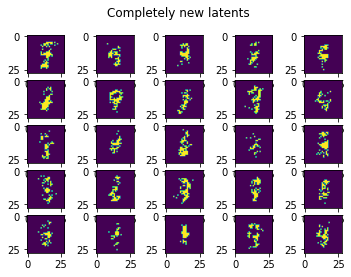

In [7]:
new_latents = helmholtz2.draw_data(25)
fig, axes = plt.subplots(5, 5)
for ax, data in zip(axes.reshape(-1), new_latents[1]):
    ax.imshow(data.detach().numpy().reshape(28, 28))
fig.suptitle('Completely new latents')

Text(0.5, 0.98, 'Infered latents, not binarised')

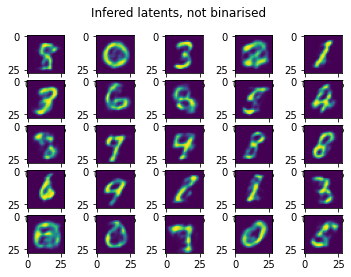

In [8]:
latents = helmholtz2.draw_latent(minibatch_data)[0]
bernoullis = helmholtz2.generative_model.layers[-1].generate_natural_parameter(latents)
fig, axes = plt.subplots(5, 5)
for ax, data in zip(axes.reshape(-1), bernoullis.detach().numpy()):
    ax.imshow(data.reshape(28, 28))
fig.suptitle('Infered latents, not binarised')